**Exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.**

In [1]:
# Importación librería

In [2]:
import pandas as pd

Lectura de archivo Customer Flight Activity.

In [3]:
df_flight = pd.read_csv("Customer Flight Activity.csv") # no utilizamos index_col = 0 para que no ponga como indice loyalty number

Visualización del archivo

In [4]:
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
df_flight.sample(20)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
231397,170566,2018,4,2,0,2,738,91.25,0,0
135002,988839,2017,8,0,0,0,0,0.00,0,0
291683,333644,2018,6,0,0,0,0,0.00,0,0
172081,264331,2017,11,0,0,0,0,0.00,0,0
281546,692121,2018,5,0,0,0,0,0.00,0,0
225972,170152,2018,12,16,2,18,3546,354.00,717,58
322803,191065,2018,8,0,0,0,0,0.00,0,0
139885,349670,2017,9,6,0,6,1218,121.00,0,0
216142,807211,2018,1,3,0,3,2688,268.00,0,0
228293,175967,2017,1,12,4,16,2048,204.00,355,29


``Fase 1: Exploración y Limpieza``

``Exploración inicial``

- información general del DataFrame
- valores nulos
- valores únicos de las columnas 
- estadísticas


In [6]:
# Con .info() obtenemos la informacion general del df (nombre columnas/no nulos/tipo de datos)

df_flight.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [7]:
# .isnull() nos permite ver los valores nulos de cada columna y con .sum() contamos cuántos valores nulos hay en cada columna

df_flight.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [8]:
# Muestra la cantidad de valores únicos por columna (cantidad de valores diferentes)

df_flight.nunique()


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

In [9]:
# Utilizamos .describe() para obtener diferentes estadísticas de los datos.

df_flight.describe().T

# No incluimos "object" porque todos los datos que tenemos son de tipo numérico.
# Utilizamos .T para cambiar filas por columnas y tener una visualización más clara.

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


Lectura de archivo Customer Loyalty History

In [10]:
df_loyalty = pd.read_csv("Customer Loyalty History.csv")

In [11]:
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [12]:
df_loyalty.sample(20)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
6910,263260,Canada,British Columbia,Victoria,V10 6T5,Female,Bachelor,62229.0,Single,Nova,5703.29,Standard,2013,10,NaN,NaN
14551,319868,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,54042.0,Married,Star,7366.09,Standard,2012,12,NaN,NaN
13916,820406,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,95306.0,Married,Star,5741.73,Standard,2015,4,NaN,NaN
4139,125068,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,19464.0,Married,Star,4064.18,2018 Promotion,2018,3,NaN,NaN
8272,483198,Canada,British Columbia,Whistler,V6T 1Y8,Male,Bachelor,92909.0,Married,Nova,8656.40,Standard,2013,5,NaN,NaN
5871,958472,Canada,New Brunswick,Fredericton,E3B 2H2,Male,Bachelor,58505.0,Married,Nova,4479.60,Standard,2017,8,NaN,NaN
4521,442479,Canada,Ontario,Toronto,M2M 6J7,Female,Bachelor,56600.0,Divorced,Nova,2896.92,Standard,2014,9,NaN,NaN
4303,451740,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,57246.0,Married,Nova,2802.62,Standard,2018,1,NaN,NaN
3293,198147,Canada,Ontario,Toronto,M8Y 4K8,Female,College,NaN,Single,Aurora,11880.97,Standard,2016,11,NaN,NaN
1221,233084,Canada,Quebec,Hull,J8Y 3Z5,Male,High School or Below,65565.0,Married,Aurora,5498.94,Standard,2014,3,NaN,NaN


``1. Exploración inicial``

- información general del DataFrame
- valores nulos
- valores únicos de las columnas 
- estadísticas

In [13]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [14]:
df_loyalty.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [15]:
df_loyalty.nunique()

Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

In [16]:
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


Gestionamos los duplicados antes de la unión de Dataframes:

In [17]:
# Contamos los duplicados en el DF flight

df_flight.duplicated().sum()

1864

In [18]:
# Contamos los duplicados en el DF loyalty

df_loyalty.duplicated().sum()

0

In [19]:
# Vemos los valores duplicados del Dataframe implicado

duplicados = df_flight[df_flight.duplicated(keep=False)]
duplicados

# El parámetro keep= False nos muestra el valor repetido (es decir,el original) y sus copias.

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405111,971370,2018,12,0,0,0,0,0.0,0,0
405409,988392,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0
405436,989528,2018,12,0,0,0,0,0.0,0,0


In [20]:
# Procedemos a borrar las filas duplicadas

df_flight_sin_duplicados = df_flight.drop_duplicates()


In [21]:
# Comprobamos que los cambios se han realizado correctamente

df_flight_sin_duplicados.duplicated().sum()

0

``Unión los dos conjuntos de datos``

In [22]:
# Utilizamos .merge para vincular ambos DataFrames por una columna común; en este caso Loyalty Number.

# Tipo de vinculación elegida: outer. 
# Así evitamos perder datos ya que nos incluye todos los registros, ya que la vinculación inner eliminaría los registros que no coinciden en ambos DataFrames.

In [23]:
df_union = pd.merge(df_flight_sin_duplicados, df_loyalty, on='Loyalty Number', how='outer')

In [24]:
df_union

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999986,2018,7,15,0,15,1995,199.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403756,999986,2018,9,0,0,0,0,0.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403757,999986,2018,10,6,0,6,708,70.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403758,999986,2018,11,11,4,15,2040,204.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [25]:
df_union.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

``2. Limpieza de Datos``

CAMBIO 1: Eliminamos o tratamos los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

In [26]:
df_union

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999986,2018,7,15,0,15,1995,199.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403756,999986,2018,9,0,0,0,0,0.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403757,999986,2018,10,6,0,6,708,70.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403758,999986,2018,11,11,4,15,2040,204.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [27]:
df_union.isnull().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
dtype: int64

In [28]:
df_union["Cancellation Year"].unique()


array([  nan, 2018., 2015., 2016., 2014., 2017., 2013.])

In [29]:
df_union["Cancellation Month"].unique()

array([nan,  3.,  8.,  6.,  9.,  2.,  7., 10.,  1.,  4., 12., 11.,  5.])

In [30]:
# Recordamos el tipo de dato que es para decidir cómo proceder con los cambios a realizar 

df_union.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

In [31]:
# Vemos el porcentaje de nulos de la columna Salary para valorar qué hacemos con ella

porcentaje_nulos_salary = df_union['Salary'].isnull().mean() * 100
porcentaje_nulos_salary

25.32692688725976

In [32]:
# Vemos el porcentaje de nulos de la columna Cancellation Year para valorar qué hacemos con ella

porcentaje_nulos_year = df_union['Cancellation Year'].isnull().mean() * 100
porcentaje_nulos_year

87.70309094511592

In [33]:
# Vemos el porcentaje de nulos de la columna Cancellation Month para valorar qué hacemos con ella

porcentaje_nulos_month = df_union['Cancellation Month'].isnull().mean() * 100
porcentaje_nulos_month

87.70309094511592

In [34]:
# Tras comprobar los valores únicos de la columna "Cancellation Year" y "Cancellation Month" y el tipo de dato (float), decidimos modificar los valores nulos por 0

df_union["Cancellation Year"].unique()

array([  nan, 2018., 2015., 2016., 2014., 2017., 2013.])

In [35]:
df_union["Cancellation Month"].unique()

array([nan,  3.,  8.,  6.,  9.,  2.,  7., 10.,  1.,  4., 12., 11.,  5.])

In [36]:
df_union.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

In [37]:
# Sustitumos los valores nulos (columnas Salary, Cancellation Year, Cancellation Month) por 0

df_union[['Salary', 'Cancellation Year', 'Cancellation Month']] = df_union[['Salary', 'Cancellation Year', 'Cancellation Month']].fillna(0)


In [38]:
# Comprobamos que se han sustituido correctamente 

df_union.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
dtype: int64

Verificamos la consistencia y corrección de los datos para asegurarnos de que los datos se presentan de forma coherente.

In [39]:
df_union

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
1,100018,2017,2,2,2,4,1320,132.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
2,100018,2018,10,6,4,10,3110,311.0,385,31,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
3,100018,2017,4,4,0,4,924,92.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
4,100018,2017,5,0,0,0,0,0.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999986,2018,7,15,0,15,1995,199.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,0.0,0.0
403756,999986,2018,9,0,0,0,0,0.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,0.0,0.0
403757,999986,2018,10,6,0,6,708,70.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,0.0,0.0
403758,999986,2018,11,11,4,15,2040,204.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,0.0,0.0


In [40]:
# Hacemos un describe para detectar valores negativos en nuestras columnas numéricas
# La columna Salary contiene valores de este tipo, así que procedemos a sustituirlos por 0 

df_union.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
Flights with Companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
Total Flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
Distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
Points Accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50
Points Redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00


CAMBIO 2: Tras analizar la columna "Salary", observamos que hay valores negativos y decidimos sustituirlos por su valor absoluto.

In [41]:
# Utilizamos .abs para convertir los valores negativos de la columna "Salary" a su valor absoluto.

df_union["Salary"] = df_union["Salary"].abs()

# No usamos replace para sustituir los valores negativos de la columna "Salary" porque sólo es válido para cadenas de texto.


In [42]:
df_union.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

In [43]:
df_union

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
1,100018,2017,2,2,2,4,1320,132.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
2,100018,2018,10,6,4,10,3110,311.0,385,31,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
3,100018,2017,4,4,0,4,924,92.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
4,100018,2017,5,0,0,0,0,0.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999986,2018,7,15,0,15,1995,199.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,0.0,0.0
403756,999986,2018,9,0,0,0,0,0.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,0.0,0.0
403757,999986,2018,10,6,0,6,708,70.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,0.0,0.0
403758,999986,2018,11,11,4,15,2040,204.0,0,0,...,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,0.0,0.0


CAMBIO 3: Cambiamos tipo de dato (float a int):

In [44]:

# Como este cambio lo queremos realizar en varias columnas, hacemos una función para aplicarlo en todas ellas de manera más rápida


In [45]:
 # Función que convierte las columnas especificadas a int 
 
 # La aplicaremos en las columnas siguientes: Points Accumulated/ Cancellation Year / Cancellation Month 

def float_to_int(df, columnas):
    try:
       
        df[columnas] = df[columnas].astype(int)    # Utilizamos .astype porque nos permite convertir el tipo de dato de las columnas que le indiquemos
        return df
    
    except Exception as error:
        print("No se ha podido realizar el cambio. Tipo de error:", error)
        return df

In [46]:
# Aplicamos sobre las columnas mencionadas: Points Accumulated/ Cancellation Year / Cancellation Month

df_cleaned =  float_to_int(df_union,["Points Accumulated", "Cancellation Year", "Cancellation Month"])

In [47]:
# Comprobamos que se han realizado los cambios

df_cleaned.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated               int32
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                int32
Cancellation Month               int32
dtype: object

``Fase 2: Visualización``

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [48]:
# Importamos las librerías necesarias para la creación de las gráficas

import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Agrupar por mes y sumamos los vuelos reservados

monthly_flights = df_cleaned.groupby("Month")["Flights Booked"].sum().reset_index()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8632\2695938855.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_flights, x="Month", y="Flights Booked", palette="YlOrRd")


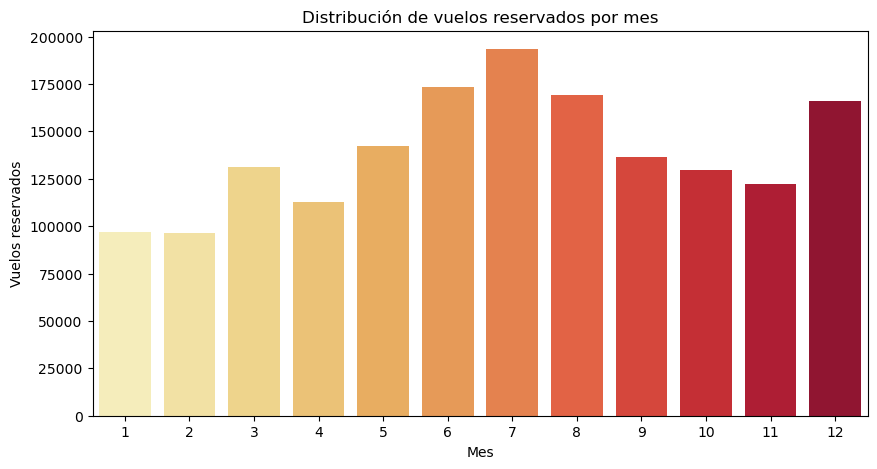

In [50]:
# Creamos un gráfico de barras (barplot)

# Utilizamos barplot porque nos permite visualizar distribuciones de manera sencilla comparando dos variables.

plt.figure(figsize=(10, 5))

sns.barplot(data=monthly_flights, x="Month", y="Flights Booked", palette="YlOrRd")

plt.title("Distribución de vuelos reservados por mes")
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados")
plt.show()



``Conclusión:`` Basándonos en la gráfica, podemos concluir que en el mes de Julio se agrupan el mayor número de reservas de vuelos.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [51]:
# Confirmamos el tipo de dato de las columnas implicadas (Distance y Points Accumulated; ambas numéricas)

df_cleaned.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated               int32
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                int32
Cancellation Month               int32
dtype: object

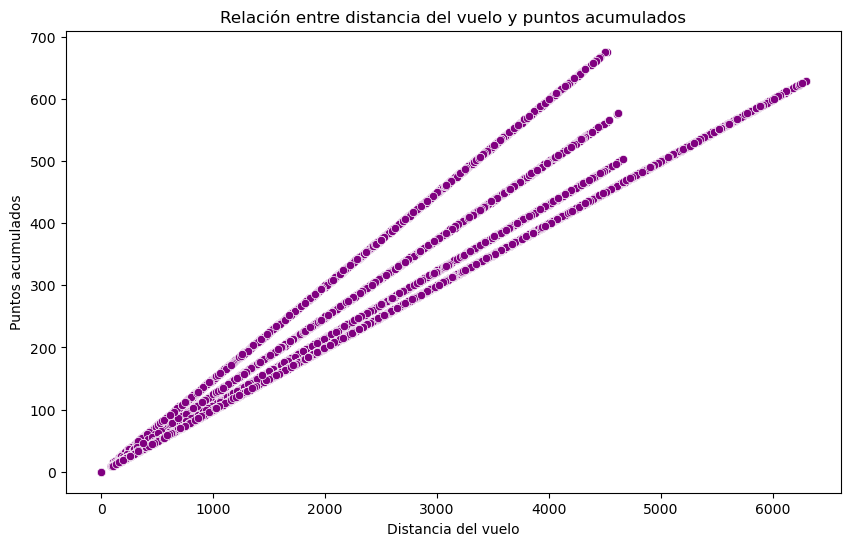

In [52]:
# Utilizamos la gráfica scatterplot porque queremos ver la relación entre dos variables numéricas 

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="Distance", y="Points Accumulated", color="purple")

plt.title("Relación entre distancia del vuelo y puntos acumulados")
plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")
plt.show()

``Conclusión:`` Podemos observar que hay una correlación positiva entre ambas variables, es decir, a medida que la distancia del vuelo aumenta, también aumentan los puntos acumulados.


3. ¿Cuál es la distribución de los clientes por provincia o estado?

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8632\1047793685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y="Province", palette="YlOrRd")


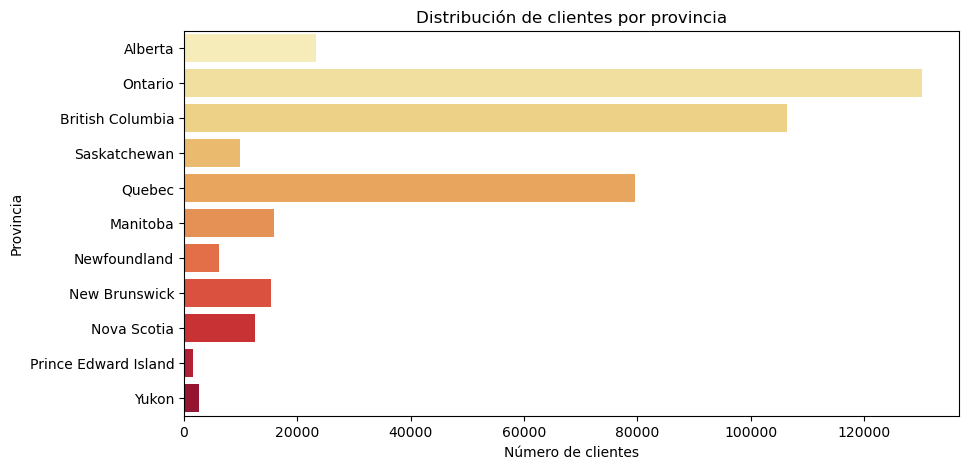

In [53]:
# Utilizamos un countplot porque nos muestra la frecuencia de cada categoría de una variable (en este caso, Province)

plt.figure(figsize=(10, 5))

sns.countplot(data=df_cleaned, y="Province", palette="YlOrRd")
plt.title("Distribución de clientes por provincia")
plt.xlabel("Número de clientes")
plt.ylabel("Provincia")
plt.show()

``Conclusión:`` Provincias como Ontario cuentan con una mayor concentración de clientes. Podría reflejar zonas con más viajeros frecuentes o donde la aerolínea tiene más presencia.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [54]:
# Calculamos el salario promedio por nivel educativo
# Agrupamos por nivel educativo

education_salary = df_cleaned.groupby("Education")["Salary"].mean().sort_values(ascending=False).reset_index()  # utilizamos sort_values para ordenar los datos y reset_index para reiniciar los índices


In [55]:
# Comprobamos que salary es una columna numérica y Education categórica

df_cleaned.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated               int32
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                int32
Cancellation Month               int32
dtype: object

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8632\3343675269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=education_salary, x="Salary", y="Education", palette="YlOrRd")


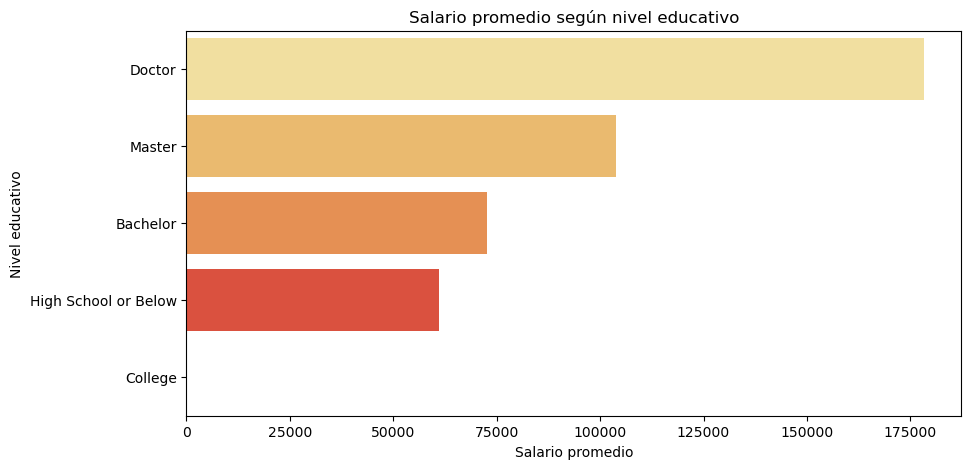

In [56]:
# Utilizamos barplot porque nos permite comparar dos variables (numérica y categórica)

plt.figure(figsize=(10, 5))

sns.barplot(data=education_salary, x="Salary", y="Education", palette="YlOrRd")

plt.title("Salario promedio según nivel educativo")
plt.xlabel("Salario promedio")
plt.ylabel("Nivel educativo")
plt.show()

``Conclusión:`` Se concluye que a mayor nivel educativo, mayor es el salario promedio (correlación positiva)

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

Utilizamos la columna:
- Loyalty Card: indica el tipo de tarjeta de fidelidad que tiene cada cliente

In [ ]:
# Contamos clientes por tipo de tarjeta de fidelidad

card_counts = df_cleaned["Loyalty Card"].value_counts()

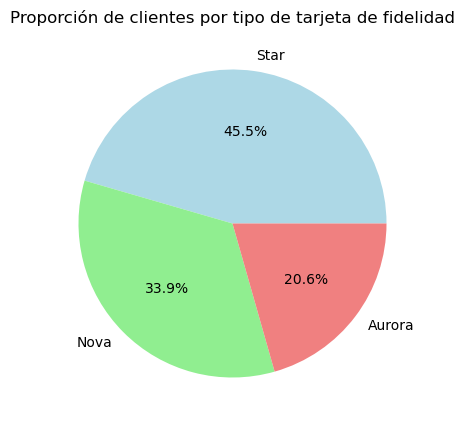

In [87]:
# Creamos gráfico (pie) . Utilizamos este gráfico porque nos permite mostrar la frecuencia de cada categoría para una variable (loyalty card)

plt.figure(figsize=(10, 5))
plt.pie(
    card_counts,
    labels=card_counts.index,      # Parámetro labels: Define las etiquetas que se mostrarán en el gráfico
    autopct="%1.1f%%",             # Parámetro autopct: Muestra el porcentaje con 1 decimal
    colors=['lightblue', 'lightgreen', 'lightcoral'] # Colores suaves
)
plt.title("Proporción de clientes por tipo de tarjeta de fidelidad")
plt.show()

``Conclusión:`` Podemos observar que hay una mayor proporción de clientes con el tipo de tarjeta Star; lo que nos permite deducir que es la tarjeta más popular o preferida entre los clientes.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

Utilizamos las columnas:
- Marital Status: Da información sobre el estado civil de los clientes
- Gender: Nos permitirá analizar cómo se distribuyen los clientes en función de su género.


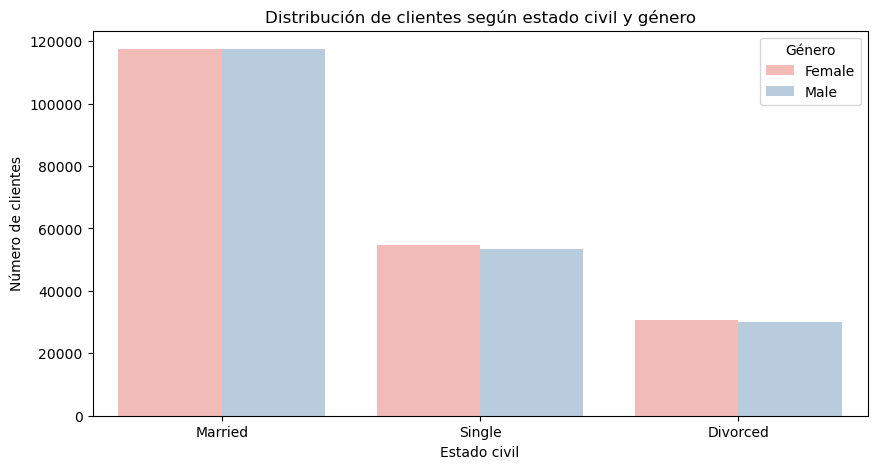

In [93]:
# Creamos la gráfica (countplot) Utilizamos esta gráfica porque nos permite ver cuántas veces aparece cada categoría en una columna de datos y nos permite comparar frecuencias.

plt.figure(figsize=(10, 5))

sns.countplot(data=df_cleaned, x="Marital Status", hue="Gender", palette="Pastel1")  # Usamos el parámetro hue para dividir los datos en subcategorías dentro de cada barra, basándose en la columna de género

plt.title("Distribución de clientes según estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")
plt.legend(title="Género")
plt.show()

``Conclusión``: Podemos concluir que la mayoría de los clientes están casados. Además, en la mayoría de los estados civiles, la proporción de hombres y mujeres es bastante similar.

``Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo``



Filtra el conjunto de datos para incluir únicamente las columnas relevantes:'Flights Booked' y 'Education'.

In [ ]:
df_filter = df_cleaned[['Flights Booked', 'Education']]
df_filter.head()

# Usamos doble corchete [[ ]] para seleccionar varias columnas de un DataFrame. Al separarlas con comas, obtenemos otro DataFrame con solo esas columnas.

,Flights Booked,Education
0,3,Bachelor
1,2,Bachelor
2,6,Bachelor
3,4,Bachelor
4,0,Bachelor


Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada grupo.

In [ ]:
# Agrupar por 'Education' y calcular estadísticas descriptivas de 'Flights Booked'

stats_education = df_filter.groupby('Education')['Flights Booked'].agg(['mean', 'std'])  # Usamos agg porque vamos a utilizar varias funciones estadísticas (media y la desviación estándar)

